In [1]:
# Zhipeng Huang's test code file for QM group work

In [ ]:

import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

In [2]:
data = pd.read_csv('data_integrated(Table1-f).csv')

In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7201 entries, 0 to 7200
Data columns (total 15 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Local authority district code                                      7201 non-null   object 
 1   Local authority district name                                      7201 non-null   object 
 2   Middle super output layer (MSOA) code                              7201 non-null   object 
 3   Middle super output layer (MSOA) name                              7201 non-null   object 
 4   Median energy efficiency score��1a��                               7201 non-null   int64  
 5   Percentage of dwellings with EPC Band 'C' or above(1b)             7201 non-null   float64
 6   Median environmental impact score(1c)                              7201 non-null   int64  
 7   Median estimated Carbon 

In [4]:
data.describe()


,Median energy efficiency score��1a��,Percentage of dwellings with EPC Band 'C' or above(1b),Median environmental impact score(1c),Median estimated Carbon dioxide (CO2) emissions (tonnes/year)(1d),Median estimated energy cost (?/year)(1e)
count,"7,201.0000","7,201.0000","7,201.0000","7,201.0000","7,201.0000"
mean,65.1316,38.9470,61.8840,3.5569,779.1680
std,4.7418,13.3904,6.4063,0.9282,171.2165
min,40.0000,3.7600,36.0000,0.5000,273.0000
25%,63.0000,29.4100,58.0000,3.0000,670.0000
50%,65.0000,37.9800,62.0000,3.4000,762.0000
75%,68.0000,47.0500,66.0000,4.0000,871.0000
max,84.0000,96.1300,93.0000,8.6000,"1,657.0000"


In [5]:
data.head(5)

,Local authority district code,Local authority district name,Middle super output layer (MSOA) code,Middle super output layer (MSOA) name,Median energy efficiency score��1a��,Percentage of dwellings with EPC Band 'C' or above(1b),Median environmental impact score(1c),Median estimated Carbon dioxide (CO2) emissions (tonnes/year)(1d),Median estimated energy cost (?/year)(1e),Community heating scheme(1f),Electricity(1f),Heat pump(1f),Mains gas(1f),Oil(1f),Other or unknown(1f)
0,E09000001,City of London,E02000001,City of London 001,72,59.7200,72,2.0000,474,36.77,39.91,2.1,20.99,:,0.23
1,E09000002,Barking and Dagenham,E02000002,Barking and Dagenham 001,66,38.1700,63,3.1000,683,5.27,12.95,0.11,81.39,:,0.28
2,E09000002,Barking and Dagenham,E02000003,Barking and Dagenham 002,63,28.5600,58,3.5000,759,4.47,16.91,:,77.61,:,1.01
3,E09000002,Barking and Dagenham,E02000004,Barking and Dagenham 003,64,31.3500,60,3.5000,778,:,3.38,:,96.37,0.08,0.17
4,E09000002,Barking and Dagenham,E02000005,Barking and Dagenham 004,66,42.4300,62,3.1000,684,1.89,5.08,:,92.94,:,0.09


In [14]:
data['Electricity(1f)' ][5]

'35.6'

In [13]:
type(data['Electricity(1f)' ][5])

str

In [25]:
print(data['Oil(1f)'][3])

0.08


In [6]:
# keep the raw data the same and use data1
data1=data

In [7]:
# change the last 5 columns' data type from object to float
for i in ['Community heating scheme(1f)','Electricity(1f)','Heat pump(1f)','Mains gas(1f)','Oil(1f)','Other or unknown(1f)']:
    data1[i] = data1[i].str.replace(':','0').astype('float')

In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7201 entries, 0 to 7200
Data columns (total 15 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Local authority district code                                      7201 non-null   object 
 1   Local authority district name                                      7201 non-null   object 
 2   Middle super output layer (MSOA) code                              7201 non-null   object 
 3   Middle super output layer (MSOA) name                              7201 non-null   object 
 4   Median energy efficiency score��1a��                               7201 non-null   int64  
 5   Percentage of dwellings with EPC Band 'C' or above(1b)             7201 non-null   float64
 6   Median environmental impact score(1c)                              7201 non-null   int64  
 7   Median estimated Carbon 

In [31]:
data1.describe()

,Median energy efficiency score��1a��,Percentage of dwellings with EPC Band 'C' or above(1b),Median environmental impact score(1c),Median estimated Carbon dioxide (CO2) emissions (tonnes/year)(1d),Median estimated energy cost (?/year)(1e),Community heating scheme(1f),Electricity(1f),Heat pump(1f),Mains gas(1f),Oil(1f),Other or unknown(1f)
count,"7,201.0000","7,201.0000","7,201.0000","7,201.0000","7,201.0000","7,201.0000","7,201.0000","7,201.0000","7,201.0000","7,201.0000","7,201.0000"
mean,65.1316,38.9470,61.8840,3.5569,779.1680,3.2051,10.7447,0.8053,79.9124,3.6729,1.6595
std,4.7418,13.3904,6.4063,0.9282,171.2165,7.1604,9.0192,1.7618,18.7838,10.0439,2.9779
min,40.0000,3.7600,36.0000,0.5000,273.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,63.0000,29.4100,58.0000,3.0000,670.0000,0.0000,4.7800,0.0000,75.5900,0.0000,0.2400
50%,65.0000,37.9800,62.0000,3.4000,762.0000,0.9400,8.4000,0.1300,86.3900,0.0800,0.5200
75%,68.0000,47.0500,66.0000,4.0000,871.0000,3.1200,13.8000,0.7200,91.8800,0.8000,1.6500
max,84.0000,96.1300,93.0000,8.6000,"1,657.0000",85.0500,93.3800,22.2800,99.6400,71.6500,33.2300


In [9]:
# don't need the first 4 columns for the regression analysis below
data_select=data1.iloc[0:,4:]

Text(0.5, 1.0, 'Correlation Matrix')

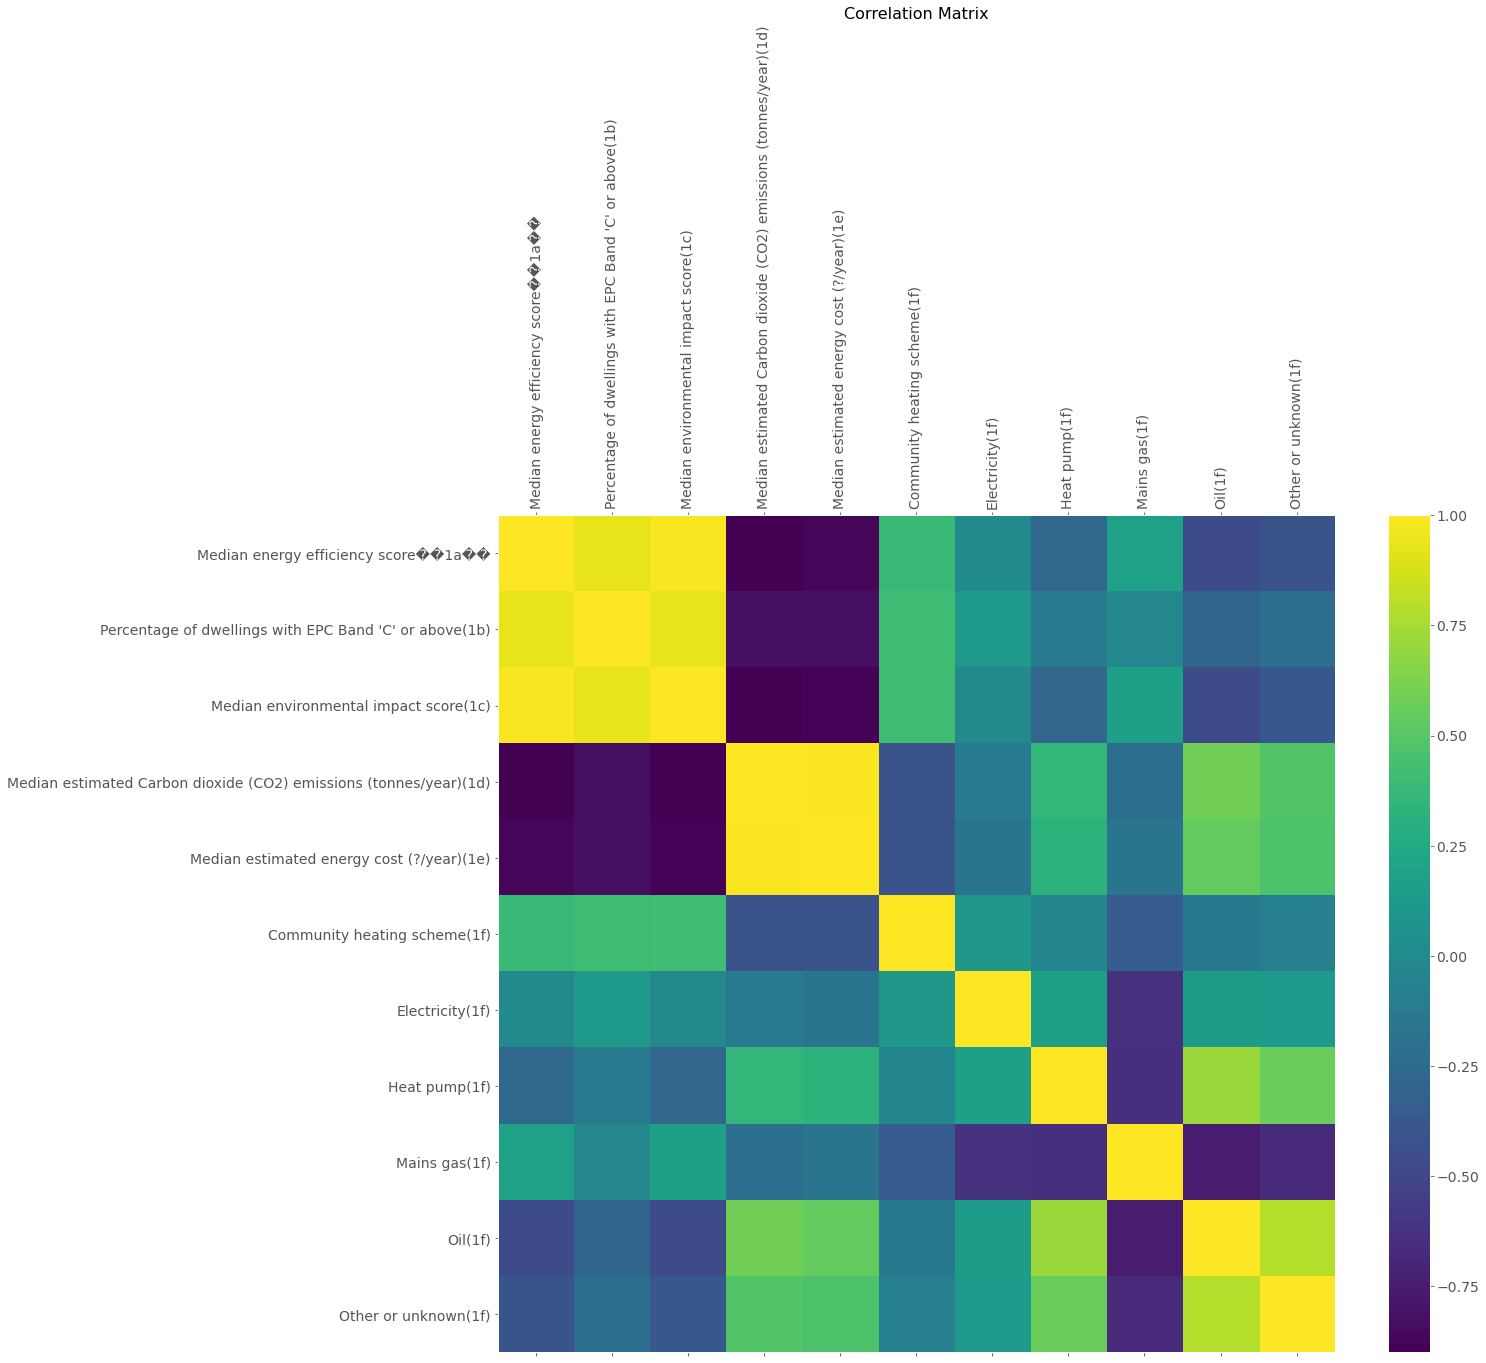

In [10]:
# do a correlation matrix, the code below is copied form the tutorial

df = data_select
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

In [11]:
# change a column's name because there is a '' in it which is difficult to deal with
data1.rename(columns={"Percentage of dwellings with EPC Band 'C' or above(1b)":"Percentage of dwellings with EPC Band C or above(1b)"},inplace=True)

In [12]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7201 entries, 0 to 7200
Data columns (total 15 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Local authority district code                                      7201 non-null   object 
 1   Local authority district name                                      7201 non-null   object 
 2   Middle super output layer (MSOA) code                              7201 non-null   object 
 3   Middle super output layer (MSOA) name                              7201 non-null   object 
 4   Median energy efficiency score��1a��                               7201 non-null   int64  
 5   Percentage of dwellings with EPC Band C or above(1b)               7201 non-null   float64
 6   Median environmental impact score(1c)                              7201 non-null   int64  
 7   Median estimated Carbon 

In [16]:
# do a multiple regression
# subset the data.
# choose a as the dependent variable and data2 except a as the independent variables
# the 6 independent variables are 6 kinds of heating methods' proportion (%) 
# so this multiple regression is to find the potential linear relationship between heating methods and a(Median estimated energy cost)

a='Median estimated energy cost (?/year)(1e)'
data2 = data_select.loc[:,[a,'Community heating scheme(1f)','Electricity(1f)','Heat pump(1f)','Mains gas(1f)','Oil(1f)','Other or unknown(1f)']]

In [17]:
data2

,Median estimated energy cost (?/year)(1e),Community heating scheme(1f),Electricity(1f),Heat pump(1f),Mains gas(1f),Oil(1f),Other or unknown(1f)
0,474,36.7700,39.9100,2.1000,20.9900,0.0000,0.2300
1,683,5.2700,12.9500,0.1100,81.3900,0.0000,0.2800
2,759,4.4700,16.9100,0.0000,77.6100,0.0000,1.0100
3,778,0.0000,3.3800,0.0000,96.3700,0.0800,0.1700
4,684,1.8900,5.0800,0.0000,92.9400,0.0000,0.0900
...,...,...,...,...,...,...,...
7196,804,0.0000,4.2700,0.2400,94.9000,0.0800,0.5100
7197,941,0.0500,6.1000,0.6400,76.1800,11.5200,5.5100
7198,1263,0.4300,20.3400,6.4600,11.0700,46.0100,15.6800
7199,422,4.6100,79.0700,0.0500,16.1500,0.0000,0.1200


In [18]:
# the code below doesn't work, I don't know why, I just copied that from the tutorial
# build the model.
# Note that we use this equation to formalute the regression model
# 'cnt ~ season_SPRING + season_SUMMER + season_FALL + season_WINTER'
# the left-hand side is the y variable and right-hand side is the x variables

model = sm.formula.ols('Percentage of dwellings with EPC Band C or above(1b) ~ Community heating scheme(1f) + Electricity(1f) + Heat pump(1f) + Mains gas(1f) + Oil(1f) + Other or unknown(1f)', data2).fit()
model.summary()

SyntaxError: invalid syntax (<unknown>, line 1)

In [19]:
# this one works
X=data2[['Community heating scheme(1f)','Electricity(1f)','Heat pump(1f)','Mains gas(1f)','Oil(1f)','Other or unknown(1f)']]
Y=data2[a]

In [20]:
X=sm.add_constant(X)

model1=sm.OLS(Y,X).fit()

model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        OLS Regression Results                                       
=====================================================================================================
Dep. Variable:     Median estimated energy cost (?/year)(1e)   R-squared:                       0.465
Model:                                                   OLS   Adj. R-squared:                  0.465
Method:                                        Least Squares   F-statistic:                     1044.
Date:                                       Tue, 30 Nov 2021   Prob (F-statistic):               0.00
Time:                                               19:39:08   Log-Likelihood:                -44997.
No. Observations:                                       7201   AIC:                         9.001e+04
Df Residuals:                                           7194   BIC:                         9.006e+04
Df Model:                                                  6                                         
Covariance Type:                                   nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                        -1.515e+04   2.23e+04     -0.679      0.497   -5.89e+04    2.86e+04
Community heating scheme(1f)   151.8173    223.202      0.680      0.496    -285.724     589.359
Electricity(1f)                155.8353    223.199      0.698      0.485    -281.701     593.372
Heat pump(1f)                  153.8693    223.185      0.689      0.491    -283.639     591.378
Mains gas(1f)                  159.5726    223.200      0.715      0.475    -277.966     597.111
Oil(1f)                        167.5815    223.201      0.751      0.453    -269.959     605.122
Other or unknown(1f)           167.2042    223.200      0.749      0.454    -270.334     604.743
==============================================================================
Omnibus:                      867.495   Durbin-Watson:                   1.498
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1863.928
Skew:                           0.739   Prob(JB):                         0.00
Kurtosis:                       5.006   Cond. No.                     1.25e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

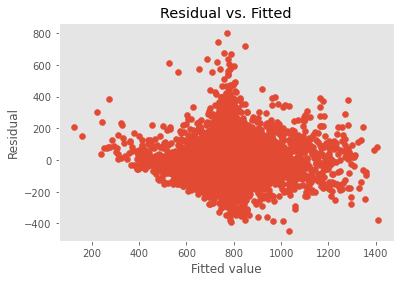

In [86]:
# residual plot 
plt.scatter(model1.fittedvalues, model1.resid)
# adding title and labels
plt.xlabel('Fitted value')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted')
plt.show()

In [21]:
# here using the VIF to avoid potential Multicollinearity， also copied from tutorial
# calculating VIF
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data. add_constant is a function from statsmodels (see the import above)
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [22]:
# do the VIF
data2_drop = drop_column_using_vif_(data2.drop(a, axis=1))
# Mains gas(1f) was dropped

Dropping: Mains gas(1f)


In [23]:
data2_drop

,Community heating scheme(1f),Electricity(1f),Heat pump(1f),Oil(1f),Other or unknown(1f)
0,36.7700,39.9100,2.1000,0.0000,0.2300
1,5.2700,12.9500,0.1100,0.0000,0.2800
2,4.4700,16.9100,0.0000,0.0000,1.0100
3,0.0000,3.3800,0.0000,0.0800,0.1700
4,1.8900,5.0800,0.0000,0.0000,0.0900
...,...,...,...,...,...
7196,0.0000,4.2700,0.2400,0.0800,0.5100
7197,0.0500,6.1000,0.6400,11.5200,5.5100
7198,0.4300,20.3400,6.4600,46.0100,15.6800
7199,4.6100,79.0700,0.0500,0.0000,0.1200


Text(0.5, 1.0, 'Correlation Matrix')

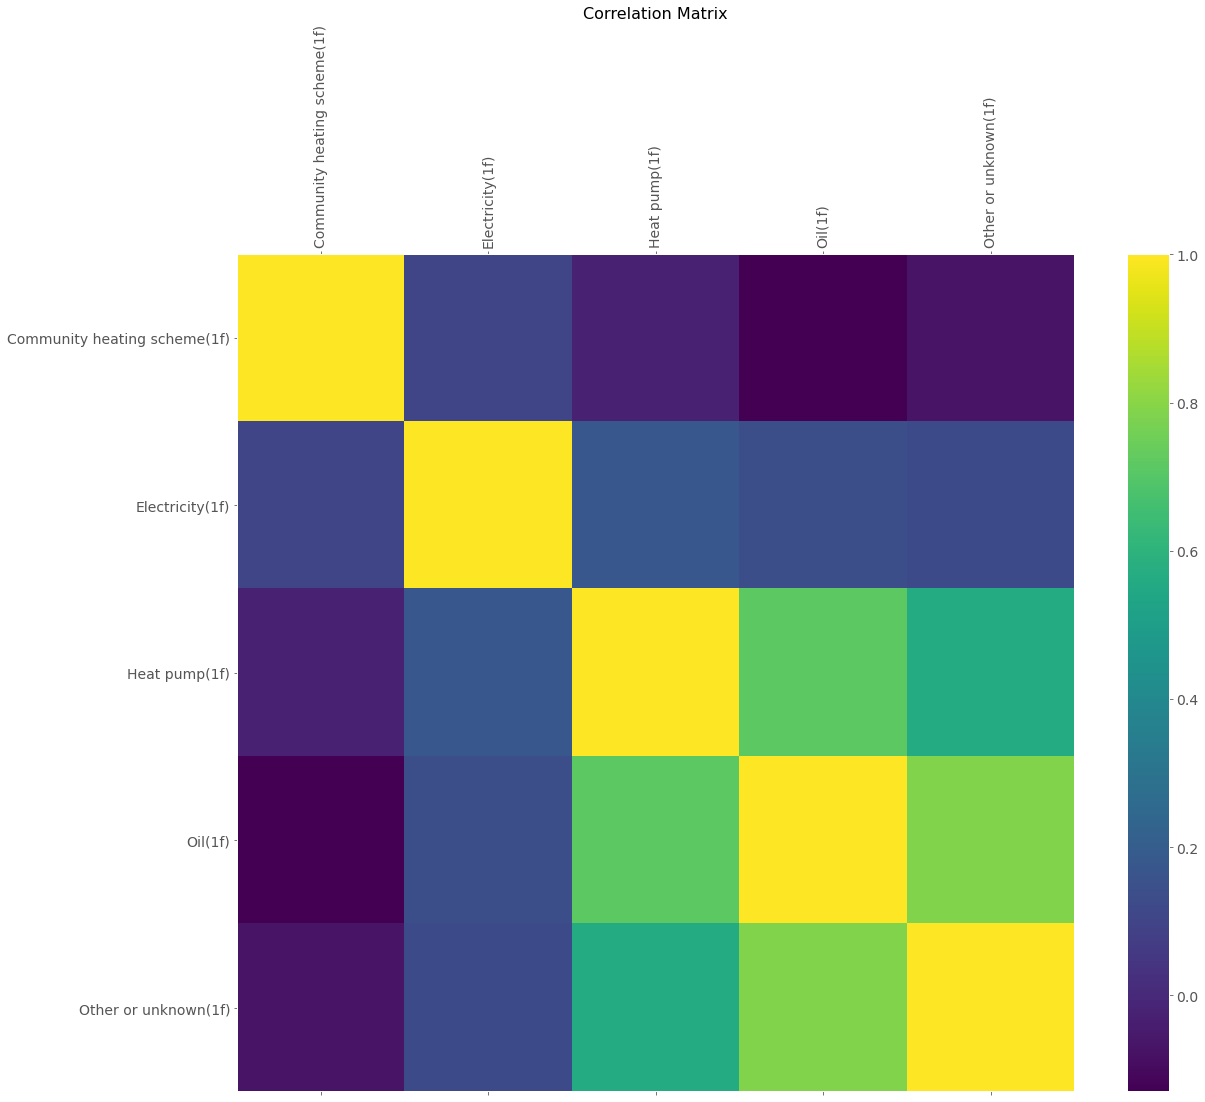

In [24]:
# again do the correlation matrix
df = data2_drop
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

In [124]:
data2_drop.describe()

,Community heating scheme(1f),Electricity(1f),Heat pump(1f),Oil(1f),Other or unknown(1f)
count,"7,201.0000","7,201.0000","7,201.0000","7,201.0000","7,201.0000"
mean,3.2051,10.7447,0.8053,3.6729,1.6595
std,7.1604,9.0192,1.7618,10.0439,2.9779
min,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.0000,4.7800,0.0000,0.0000,0.2400
50%,0.9400,8.4000,0.1300,0.0800,0.5200
75%,3.1200,13.8000,0.7200,0.8000,1.6500
max,85.0500,93.3800,22.2800,71.6500,33.2300


In [25]:
# again do the multi regression
X1=data2_drop
Y1=data2[a]

In [26]:
X1=sm.add_constant(X1)

In [27]:
X1

,const,Community heating scheme(1f),Electricity(1f),Heat pump(1f),Oil(1f),Other or unknown(1f)
0,1.0000,36.7700,39.9100,2.1000,0.0000,0.2300
1,1.0000,5.2700,12.9500,0.1100,0.0000,0.2800
2,1.0000,4.4700,16.9100,0.0000,0.0000,1.0100
3,1.0000,0.0000,3.3800,0.0000,0.0800,0.1700
4,1.0000,1.8900,5.0800,0.0000,0.0000,0.0900
...,...,...,...,...,...,...
7196,1.0000,0.0000,4.2700,0.2400,0.0800,0.5100
7197,1.0000,0.0500,6.1000,0.6400,11.5200,5.5100
7198,1.0000,0.4300,20.3400,6.4600,46.0100,15.6800
7199,1.0000,4.6100,79.0700,0.0500,0.0000,0.1200


In [28]:
Y1

0        474
1        683
2        759
3        778
4        684
        ... 
7196     804
7197     941
7198    1263
7199     422
7200     459
Name: Median estimated energy cost (?/year)(1e), Length: 7201, dtype: int64

In [29]:
model2=sm.OLS(Y1,X1).fit()

model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        OLS Regression Results                                       
=====================================================================================================
Dep. Variable:     Median estimated energy cost (?/year)(1e)   R-squared:                       0.465
Model:                                                   OLS   Adj. R-squared:                  0.465
Method:                                        Least Squares   F-statistic:                     1252.
Date:                                       Tue, 30 Nov 2021   Prob (F-statistic):               0.00
Time:                                               19:44:43   Log-Likelihood:                -44997.
No. Observations:                                       7201   AIC:                         9.001e+04
Df Residuals:                                           7195   BIC:                         9.005e+04
Df Model:                                                  5                                         
Covariance Type:                                   nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          806.6779      2.450    329.241      0.000     801.875     811.481
Community heating scheme(1f)    -7.7563      0.211    -36.847      0.000      -8.169      -7.344
Electricity(1f)                 -3.7365      0.167    -22.314      0.000      -4.065      -3.408
Heat pump(1f)                   -5.6900      1.208     -4.709      0.000      -8.059      -3.321
Oil(1f)                          8.0083      0.284     28.194      0.000       7.452       8.565
Other or unknown(1f)             7.6327      0.805      9.478      0.000       6.054       9.211
==============================================================================
Omnibus:                      867.122   Durbin-Watson:                   1.498
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1860.968
Skew:                           0.739   Prob(JB):                         0.00
Kurtosis:                       5.004   Cond. No.                         25.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
# some boxplot and scatter plot, maybe should have done before the multi regression
n = data1['Median estimated Carbon dioxide (CO2) emissions (tonnes/year)(1d)']
m = data2['Electricity(1f)']

In [31]:
m.max()

93.38

{'whiskers': [<matplotlib.lines.Line2D at 0x1c192398940>,
 'caps': [<matplotlib.lines.Line2D at 0x1c1923a6040>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c1923985e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c1923a6700>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c1923a6a60>],
 'means': []}

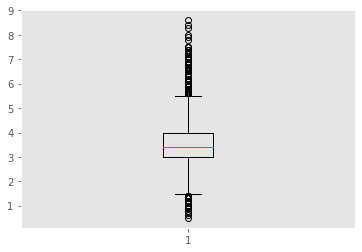

In [32]:
# boxplot of Median estimated Carbon dioxide (CO2) emissions
plt.boxplot(n)

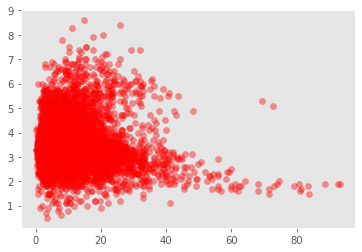

In [33]:
# scatter plot of Median estimated Carbon dioxide (CO2) emissions and Electricity
# plt.xlim(xmax = 30,xmin = 0)
# plt.ylim(ymax = 100,ymin = 0)
plt.scatter(m, n, c='r', alpha=0.4, label='Oil and Heat pump')